# codecentric.AI Bootcamp - Random Forests

## Aufgaben + Lösungen

Hier findet ihr die Lösungen zu den Random Forest Aufgaben.

Die folgenden Pakete werden geladen:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Aufgabe 1: Datensätze aus Scikit-learn laden

Für die nachfolgenden Übungsaufgaben wollen wir zwei Datensätze verwenden, einen für Klassifikationsmodelle und einen anderen für Regressionsmodelle.

- Importiere die Funktion zum Laden des `iris` Datensatzes.
- Importiere die Funktion zum Laden des `boston` Datensatzes.

In [3]:
# Irisdaten für Klassifikation
from sklearn.datasets import load_iris

# Boston Hauspreise für Regression
from sklearn.datasets import load_boston

- Lade den `iris` Datensatz ohne weitere Argumente anzugeben und gucke dir die Beschreibung an.

In [4]:
data_iris = load_iris()
print(data_iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

- Lade den `iris` Datensatz so, dass du zwei einzelne Objekte zurück bekommst: einen für die Featurewerte und einen für die Antwortvariable.

In [5]:
features_iris, target_iris = load_iris(return_X_y=True)

- Lade den `boston` Datensatz ohne weitere Argumente anzugeben und gucke dir die Beschreibung an.

In [6]:
data_boston = load_boston()
print(data_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

- Lade den `boston` Datensatz so, dass du zwei einzelne Objekte zurück bekommst: einen für die Featurewerte und einen für die Antwortvariable.

In [7]:
features_boston, target_boston = load_boston(return_X_y=True)

### Aufgabe 2: Daten mit Scikit-learn in Trainings- und Testsets aufteilen

Nun wollen wir die beiden Datensätze, die wir geladen haben, in Trainings- und Testsets aufteilen.

- Importiere die entsprechene Funktion für das Aufteilen der Datensätze aus Scikit-learn.

- Teile die Feature und Targets des `iris` Datensatzes in zwei Sets ein: 80% der Daten sollen in das Trainingsset, 20% in das Testset. 
- Stratifiziere die Aufteilung anhand der Antwortvariablen.

In [8]:
from sklearn.model_selection import train_test_split

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(features_iris, 
                                                                        target_iris,
                                                                        test_size = 0.2,
                                                                        random_state = 42,
                                                                        stratify = target_iris)

- Teile die Feature und Targets des `boston` Datensatzes in zwei Sets ein: 80% der Daten sollen in das Trainingsset, 20% in das Testset.

In [9]:
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(features_boston, 
                                                                                target_boston,
                                                                                test_size = 0.2,
                                                                                random_state = 42)

### Aufgabe 3: Klassifikation mit Random Forests in Scikit-learn

Nun sind unsere `iris` Daten bereit für das Trainieren von Modellen.

- Importiere den Random Forest Klassifikationsalgorithmus.
- Definiere den Random Forest Algorithmus mit den folgenden Hyperparametern: 200 Bäume mit maximaler Tiefe von 3. maximaler Anzahl in Betracht zu ziehender Feature von 3 und aktiviere Out-Of-Bag Sampling.
- Trainiere das so definierte Modell auf den `iris` Trainingsdaten.

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_model_class = RandomForestClassifier(n_estimators = 200, 
                                        max_depth = 3,
                                        max_features = 3,
                                        oob_score = True,
                                        random_state = 42)
rf_model_class.fit(X_train_iris, y_train_iris)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

- Importiere die Funktion zur Erstellung von Kreuzmatrizen aus Scikit-learn.
- Nutze das Random Forest Klassifikationsmodell um Vorhersagen auf den Testdaten zu machen.
- Vergleiche die vorhergesagten Klassen mit den tatsächlichen Klassen des Testsets, indem du die Kreuzmatrix ausgeben lässt.

In [11]:
from sklearn.metrics import confusion_matrix

y_pred_rf_class = rf_model_class.predict(X_test_iris)

confusion_matrix(y_test_iris, y_pred_rf_class, labels=np.unique(y_test_iris))

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

### Aufgabe 4: Regression mit Random Forests in Scikit-learn

Auch unsere `boston` Daten sind bereit für das Trainieren von Modellen.

- Importiere den Random Forest Regressionsalgorithmus.
- Definiere den Random Forest Algorithmus mit den folgenden Hyperparametern: 200 Bäume mit maximaler Tiefe von 3. maximaler Anzahl in Betracht zu ziehender Feature von 3 und aktiviere Out-Of-Bag Sampling.
- Trainiere das so definierte Modell auf den `boston` Trainingsdaten.

In [12]:
from sklearn.ensemble import RandomForestRegressor

rf_model_reg = RandomForestRegressor(n_estimators = 200, 
                                        max_depth = 3,
                                        max_features = 3,
                                        oob_score = True,
                                        random_state = 42)
rf_model_reg.fit(X_train_boston, y_train_boston)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

- Nutze das Random Forest Regressionsmodell um Vorhersagen auf den Testdaten zu machen.

In [13]:
y_pred_rf_reg = rf_model_reg.predict(X_test_boston)

- Importiere die Funktion für den mittleren absoluten Fehler aus Scikit-learn.
- Berechne den mittleren absoluten Fehler für die Vorhersagen der Testdaten.

In [14]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test_boston, y_pred_rf_reg)

2.8466910083942834

### Aufgabe 5: Datenvorbereitung für h2o

Mit Scikit-learn hast du erfolgreich Klassifikations- und Regressionsmodelle mit Random Forest trainiert. Jetzt wollen wir uns angucken, wie das Ganze mit h2o funktioniert.

- Importiere die Random Forest Funktion aus h2o.

In [15]:
import h2o
h2o.init(nthreads = -1)

from h2o.estimators.random_forest import H2ORandomForestEstimator

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_181"; OpenJDK Runtime Environment (build 1.8.0_181-8u181-b13-1~deb9u1-b13); OpenJDK 64-Bit Server VM (build 25.181-b13, mixed mode)
  Starting server from /usr/local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpmgua7wqq
  JVM stdout: /tmp/tmpmgua7wqq/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpmgua7wqq/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.8
H2O cluster version age:,1 month and 9 days
H2O cluster name:,H2O_from_python_unknownUser_qewad1
H2O cluster total nodes:,1
H2O cluster free memory:,444.5 Mb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


- Bereite den `iris` Datensatz vor indem du ein pandas DataFrame aus Featuren und Antwortvariablen generierst.

In [16]:
df_iris = pd.DataFrame(data_iris.data, columns=data_iris.feature_names)
target_iris = pd.DataFrame({'class':data_iris.target})

df_c_iris = pd.concat([target_iris, df_iris], axis=1)
df_c_iris.head()

,class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


- Bereite auch den `boston` Datensatz vor indem du ebenfalls ein pandas DataFrame aus Featuren und Antwortvariablen generierst.

In [17]:
df_boston = pd.DataFrame(data_boston.data, columns=data_boston.feature_names)
target_boston = pd.DataFrame({'target':data_boston.target})

df_c_boston = pd.concat([target_boston, df_boston], axis=1)
df_c_boston.head()

,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Aufgabe 6: Random Forest Klassifikation mit h2o

- Konvertiere das so erstellte pandas DataFrame für die `iris` Daten in ein h2o Frame.
- Wandle die Antwortvariable in kategorische Variablen um.

In [18]:
hf_iris = h2o.H2OFrame(df_c_iris)
hf_iris[0] = hf_iris[0].asfactor()  

/usr/local/lib/python3.6/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%


- Teile die Daten in 3 Sets auf: 70% für Training, 15% für Validierung und 15% fürs Testen.

In [19]:
train_iris, valid_iris, test_iris = hf_iris.split_frame([0.7, 0.15], seed=42)

- Definiere einen Vektor mit Spaltennamen aller Feature.

In [20]:
hf_X_iris = hf_iris.col_names[1:len(hf_iris.col_names)]
hf_X_iris

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

- Definiere einen Vektor mit dem Namen der Antwortvariablen.

In [21]:
hf_y_iris = hf_iris.col_names[0]
hf_y_iris

'class'

- Definiere die Random Forest Funktion aus h2o mit den folgenden Hyperparametern: 300 Bäumen, maximaler Baumtiefe von 3 und maximaler Laufzeit von 60 Sekunden.

In [22]:
rf_class = H2ORandomForestEstimator(
    ntrees = 300,
    max_depth = 3,
    max_runtime_secs = 60,
    seed = 42
)

- Trainiere den Random Forest Algorithmus mit den `iris` Trainings- und Validierungsdaten.

In [23]:
rf_class.train(x = hf_X_iris, 
               y = hf_y_iris, 
               training_frame = train_iris, 
               validation_frame = valid_iris)

drf Model Build progress: |███████████████████████████████████████████████| 100%


- Berechne die Modell-Performance auf den Testdaten.

In [24]:
performance_class = rf_class.model_performance(test_data=test_iris)
print(performance_class)


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.031334209099925556
RMSE: 0.1770147143599242
LogLoss: 0.09474294098510058
Mean Per-Class Error: 0.13333333333333333
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



0,1,2,Error,Rate
8.0,0.0,0.0,0.0,0 / 8
0.0,8.0,0.0,0.0,0 / 8
0.0,2.0,3.0,0.4,2 / 5
8.0,10.0,3.0,0.0952381,2 / 21


Top-3 Hit Ratios: 


k,hit_ratio
1,0.9047619
2,1.0
3,1.0


### Aufgabe 7: Random Forest Regression mit h2o

- Konvertiere das oben erstellte pandas DataFrame für die `boston` Daten in ein h2o Frame.
- Teile die Daten in zwei Sets auf: 70% für Training, 15% fürs Testen.

In [25]:
hf_boston = h2o.H2OFrame(df_c_boston)
train_boston, test_boston = hf_boston.split_frame([0.7], seed=42)

Parse progress: |█████████████████████████████████████████████████████████| 100%


- Definiere einen Vektor mit Spaltennamen aller Feature.

In [26]:
hf_X_boston = hf_boston.col_names[1:len(hf_boston.col_names)]
hf_X_boston

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

- Definiere einen Vektor mit dem Namen der Antwortvariablen.

In [27]:
hf_y_boston = hf_boston.col_names[0]
hf_y_boston

'target'

- Definiere die Random Forest Funktion aus h2o mit den folgenden Hyperparametern: 300 Bäumen, maximaler Baumtiefe von 3, 5-facher Kreuzvalidierung und stoppe das Training wenn die Wurzel des mittleren Quadratfehlers 3x hintereinander nicht mindestens um 0.0001 besser wird.

In [28]:
rf_reg = H2ORandomForestEstimator(
    ntrees = 300,
    max_depth = 3,
    stopping_rounds = 3,
    stopping_metric = 'rmse',
    stopping_tolerance = 0.0001,
    nfolds = 5,
    seed = 42
)

- Trainiere den Random Forest Algorithmus mit den `boston` Trainingsdaten.

In [29]:
rf_reg.train(x = hf_X_boston, 
             y = hf_y_boston, 
             training_frame = train_boston)

drf Model Build progress: |███████████████████████████████████████████████| 100%


- Berechne die Modell-Performance auf den Testdaten.

In [30]:
performance_reg = rf_reg.model_performance(test_data=test_boston)
print(performance_reg)


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 22.889570011186223
RMSE: 4.784304548331578
MAE: 3.31068711827515
RMSLE: 0.2336367001222853
Mean Residual Deviance: 22.889570011186223



- Lasse dir Werte für die Antwortvariable für alle Testdaten vorhersagen. 

In [31]:
pred_test_boston = rf_reg.predict(test_boston)
pred_test_boston

drf prediction progress: |████████████████████████████████████████████████| 100%


predict
22.7213
21.7545
20.7329
21.2357
21.2357
20.6641
22.3964
20.1946
20.1946
22.9346


Diese vorhergesagten Werte können wir zum Beispiel gegen die tatsächlichen Werte plotten:

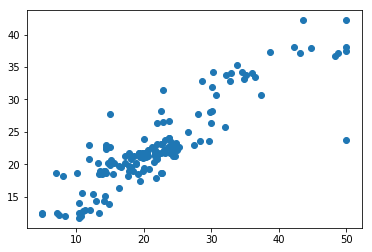

In [32]:
plt.scatter(test_boston.as_data_frame().target, pred_test_boston.as_data_frame().predict)